# Customer Chrun Prediction 

## Did you know that attracting a new customer is 5 to 7 times more expensive than keeping one ? 

## Content

1. Introduction
   - What is Customer Churn?
   - How can customer churn be reduced?
   - Objectives
2. Loading libraries and data
3. Understanding the data
4. Visualize missing values
5. Data Manipulation
6. Data Visualization
7. Data Preprocessing
   - Standardizing numeric attributes
8. Machine Learning Model Evaluations and Predictions
    - KNN
    - SVC


## 1 Intoduction 

Definition : Customer Churn (or attrition rate) refers to the percentage of customers who stop using a company's product or service over a given period. It’s a key metric in business analytics, especially for subscription-based businesses and service providers.

📊 Key Figures & Industry Benchmarks : 
- Average churn rate across industries: ~5-7% annually
- SaaS (Software as a Service) industry: ~3-8% monthly churn
- Telecommunications: ~1.5-2% monthly churn
- E-commerce: ~25-30% annual churn
- Banking & Financial Services: ~15-25% annual churn

📉 Why Does Churn Matter?
- Acquiring a new customer is ~5/7x more expensive than retaining an existing one.
- A 5% increase in customer retention can boost profits by 25-95% (Bain & Company).
- Reducing churn leads to higher Customer Lifetime Value (CLV) and lower Customer Acquisition Cost (CAC).

### How to reduce/improve Customer churn ? 

1️⃣ Identify At-Risk Customers 🕵️‍♂️
🔍 How?

- Use predictive analytics to spot patterns of disengagement.
- Monitor key churn indicators: drop in usage, lower engagement, late payments, complaints.
- Implement churn prediction models (e.g., logistic regression, decision trees, LSTM).

2️⃣ Monitor Churn Metrics & Continuously Improve 📊
🔍 Key Metrics to Track:

- Churn Rate (%) = (Lost Customers / Total Customers) * 100
- Customer Lifetime Value (CLV)
- Customer Retention Rate (CRR)
- Monthly Recurring Revenue (MRR) Churn

3️⃣ Offer Personalization & Loyalty Programs 🎁
🔍 Why?

- Customers stay when they feel valued & recognized.
- Personalization boosts retention by 20-30% (McKinsey).

### Headlines 

we'll dig into those X to find any patterns causing customer churn : 
- General Churn Analysis
- Service Usage & Churn
- Financial Factors & Churn
- Predicting Churn & Customer Segmentation

## 2. Loading Libraires and Data 

In [14]:
import pandas as pd
import numpy as np
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [22]:
# Loading the Data 

df = pd.read_csv('churn.csv')

## 3. Understanding the Data 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [32]:
df.shape

(7043, 21)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## 4. Missing data ? 

In [46]:
import missingno as msno

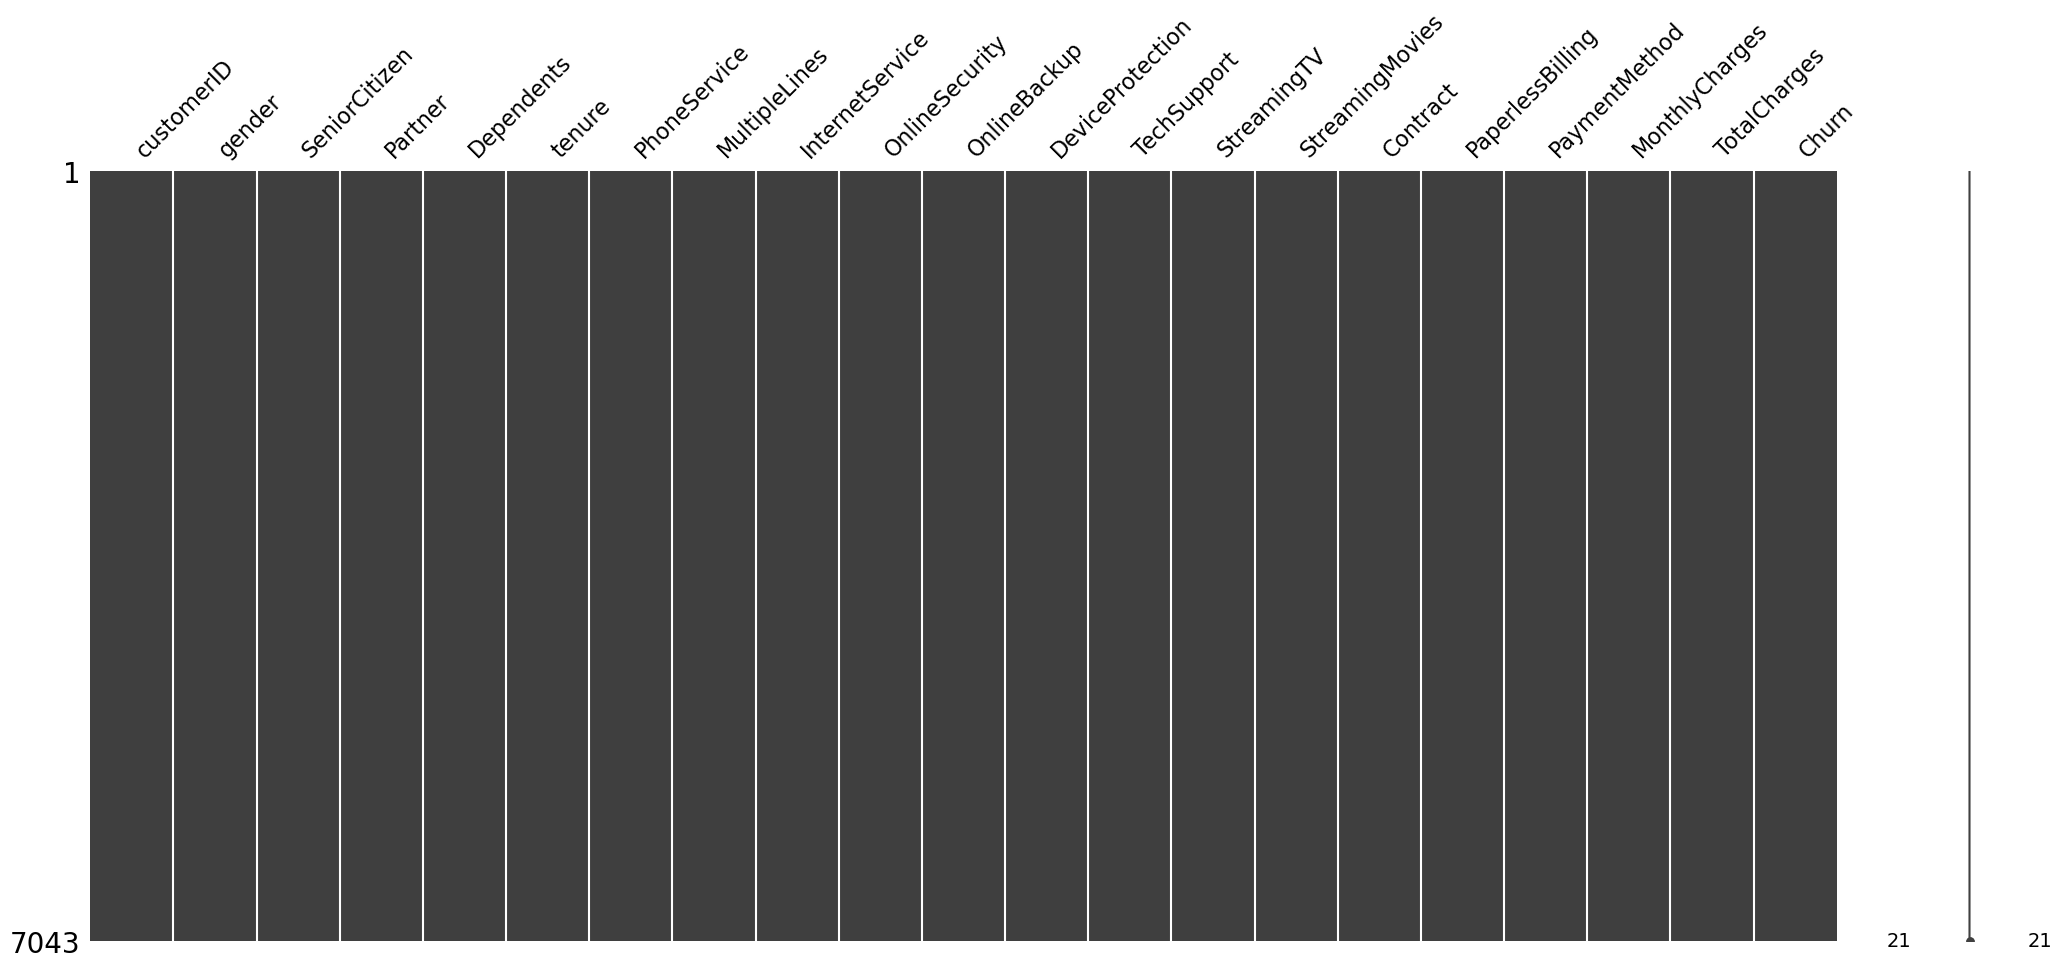

In [48]:
# Visualize missing values as a matrix
msno.matrix(df);

In [56]:
# Check for missing values ( True if there are missing values )
print(df.isnull().values.any()) 

False


### From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact with the test we can say that there is no missing data.

## 5. Data Manipulation 

In [62]:
# Geting rid of the customer id 
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Indirect missingness can be found in our data as blankspaces for example. Let's find out!

In [66]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [69]:
# Check those lines 
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Btw we note that tenure is 0 even tho monthlyCharges column isnt empty. 

In [72]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column. 

### Let's delete the rows with missing values in Tenure columns since there are only 11 rows out of +7000.

In [77]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

### To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [81]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [83]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Denumerizing the SeniorCitizen column 

In [86]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## 6. Data Visualisation 

🔹 **1. Taux de Churn (Customer Churn Rate)**  
Quelle proportion des clients ont quitté l’entreprise ?  
📌 **Type de graphique : Camembert (Pie Chart)**

Ce graphique en camembert représente la répartition des clients qui sont restés et ceux qui ont quitté l’entreprise.

- "Clients stayed (No Churn)" (en bleu) correspond aux clients qui sont restés.  
- "Clients left (Churn)" (en rouge) représente ceux qui ont mis fin à leur abonnement.  

Cela permet d’avoir une première vue d’ensemble sur le churn et son importance dans l’ensemble de la clientèle.


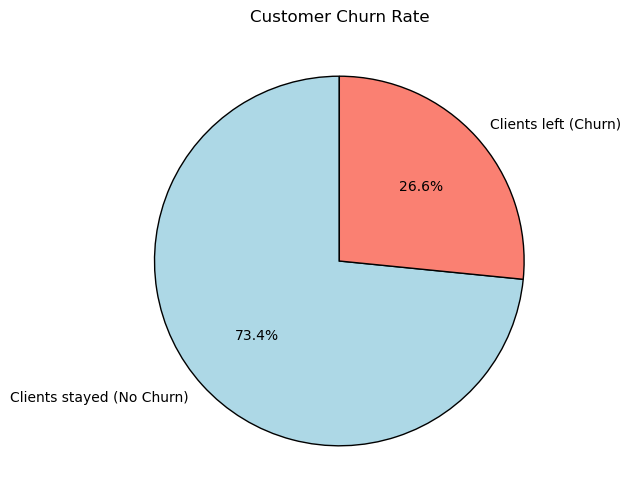

In [126]:
# 2. Visualize Churn Rate (Pie Chart)

plt.figure(figsize=(6, 6))
df["Churn"].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=["lightblue", "salmon"], 
    labels=["Clients stayed (No Churn)", "Clients left (Churn)"], 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}  
)
plt.title("Customer Churn Rate")
plt.ylabel("")
plt.show()


🔹 **2. Distribution du Churn en fonction du Genre**  
Comment le churn est-il distribué selon le genre des clients ?  
📌 **Type de graphique : Camembert (Pie Chart)**

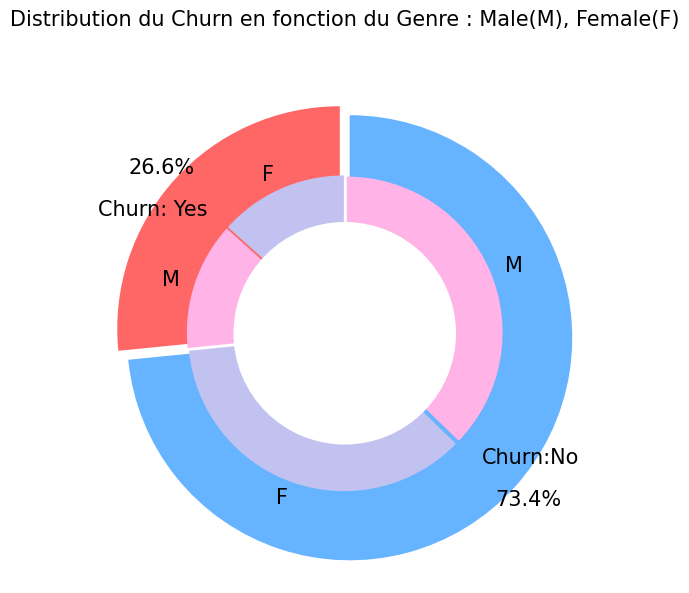

In [180]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution du Churn en fonction du Genre : Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

🔹 **3. Compare Churn vs. Non-Churn Across Key Features**  
Comment les charges mensuelles varient-elles selon le statut de churn ?  
📌 **Type de graphique : Histogramme avec Densité (Histogram with Density Curve)**


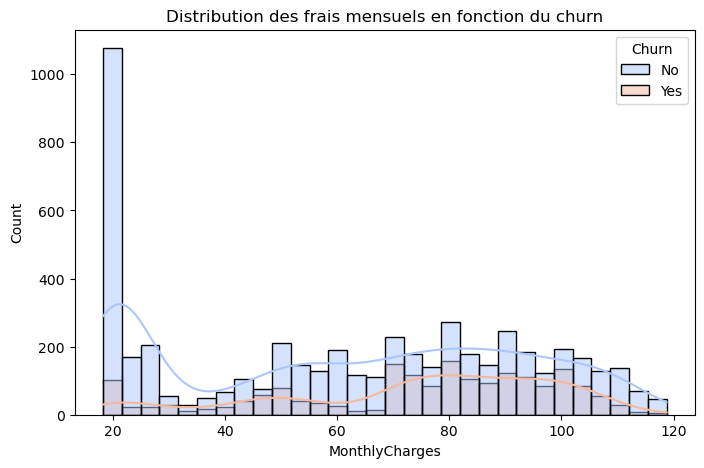

In [166]:
plt.figure(figsize=(8, 5))  
sns.histplot(df, x="MonthlyCharges", hue="Churn", kde=True, bins=30, palette="coolwarm")  
plt.title("Distribution des frais mensuels en fonction du churn")  
plt.show()

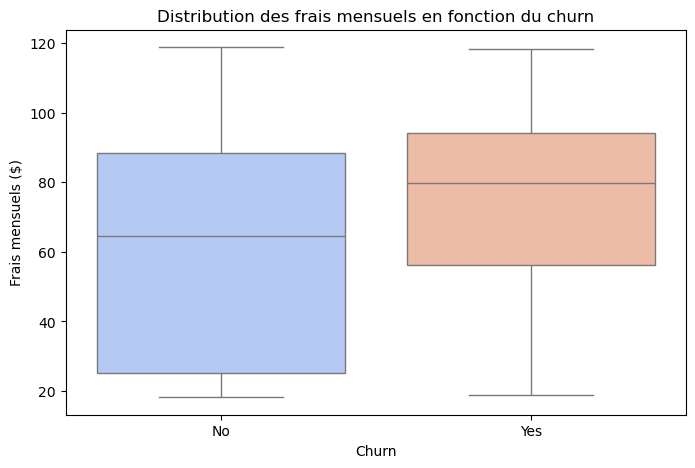

In [168]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="coolwarm")
plt.title("Distribution des frais mensuels en fonction du churn")
plt.xlabel("Churn")
plt.ylabel("Frais mensuels ($)")
plt.show()

🔹 **4. Répartition du churn par catégorie de contrat**
Les contrats courts (ex. "Month-to-month") ont-ils un churn plus élevé ?
📌 **Type de graphique : Barplot**

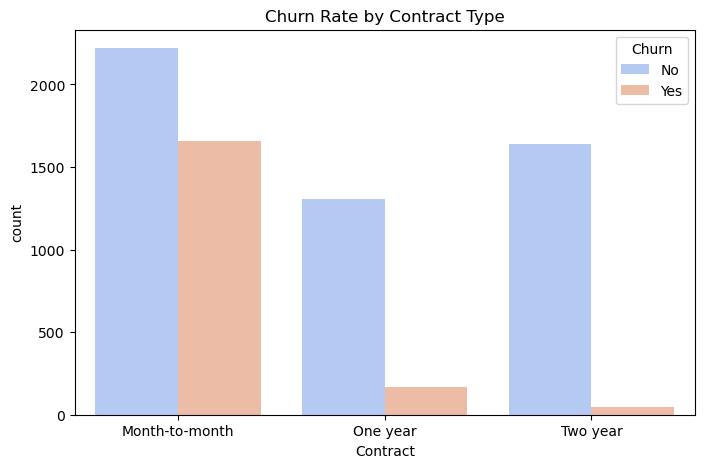

In [100]:
# Example: Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Contract", hue="Churn", palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.show()

🔹 **5. Churn en fonction du Mode de Paiement**  
Comment le taux de churn varie-t-il selon le mode de paiement des clients ?  
📌 **Type de graphique : Diagramme de Comptage (Count Plot)**

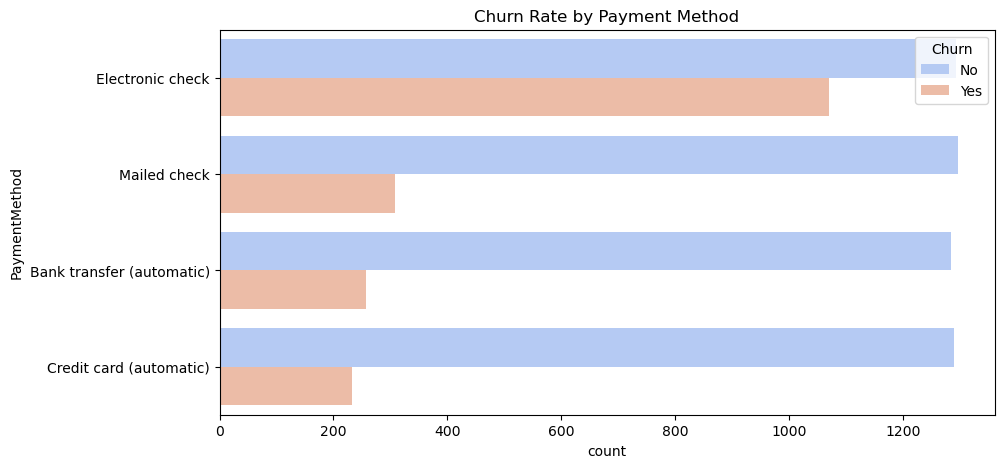

In [102]:
# Example: Payment Method
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="PaymentMethod", hue="Churn", palette="coolwarm")
plt.title("Churn Rate by Payment Method")
plt.show()

🔹 **6. Compare Churn vs. Services Utilisés**  
Comment le churn varie-t-il en fonction des services utilisés par les clients ?  
📌 **Type de graphique : Diagramme de Comptage (Count Plot)**

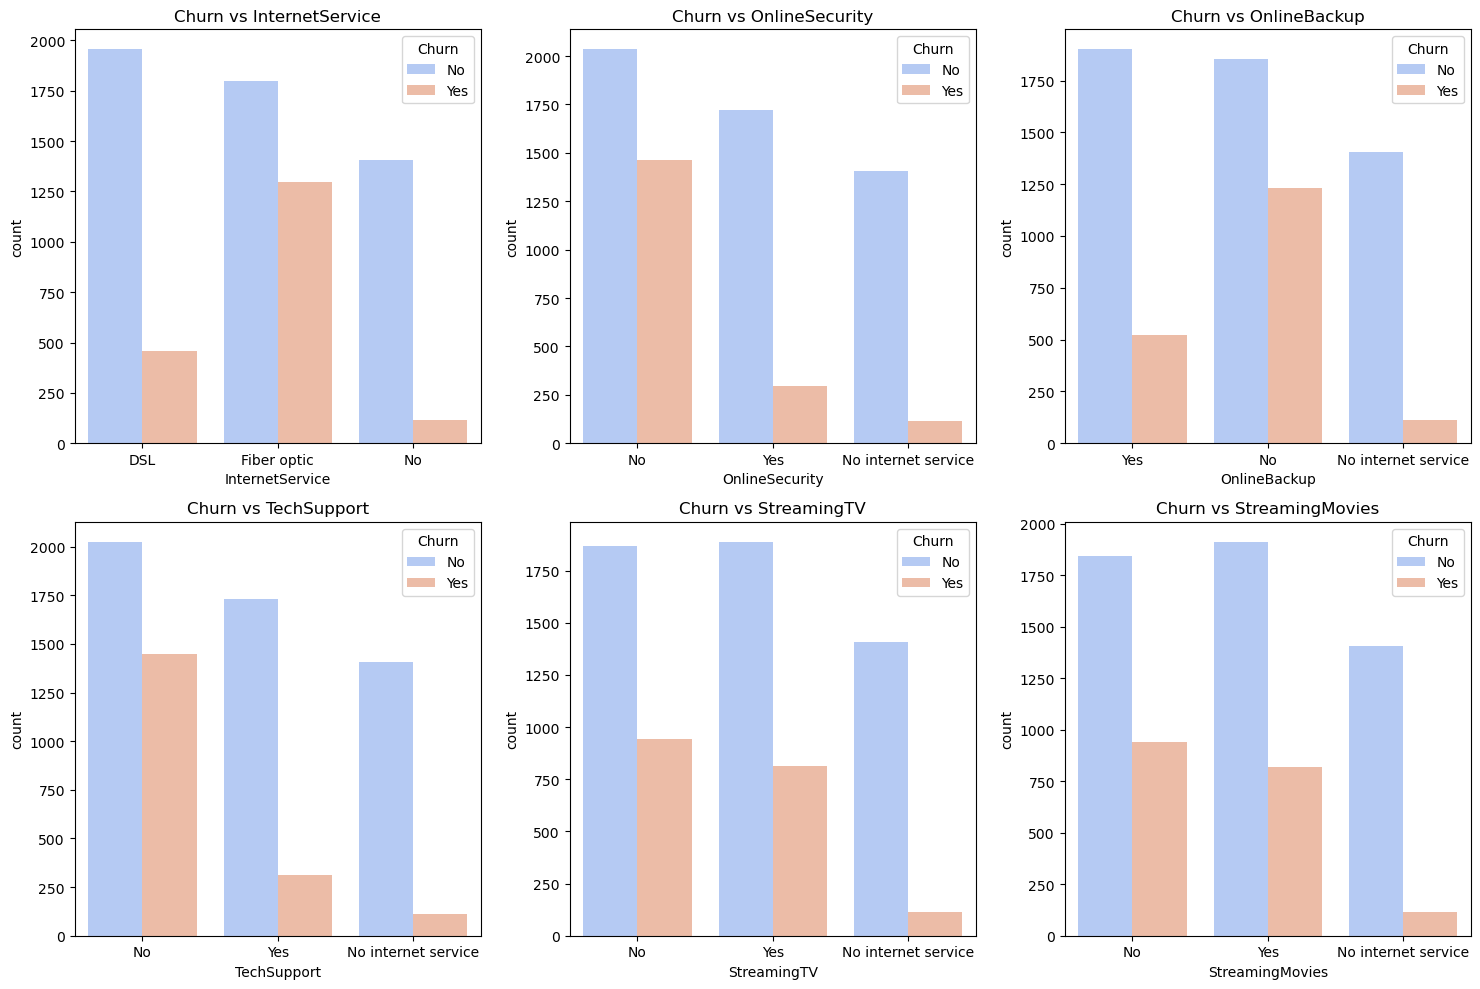

In [136]:
services = ["InternetService", "OnlineSecurity", "OnlineBackup", "TechSupport", "StreamingTV", "StreamingMovies"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(services):
    ax = axes[i//3, i%3]
    sns.countplot(data=df, x=col, hue="Churn", palette="coolwarm", ax=ax)
    ax.set_title(f"Churn vs {col}")

plt.tight_layout()
plt.show()


🔹 **7. Trouver les Corrélations Entre les Variables**  
Comment les différentes caractéristiques sont-elles corrélées entre elles ?  
📌 **Type de graphique : Carte de Chaleur des Corrélations (Correlation Heatmap)**

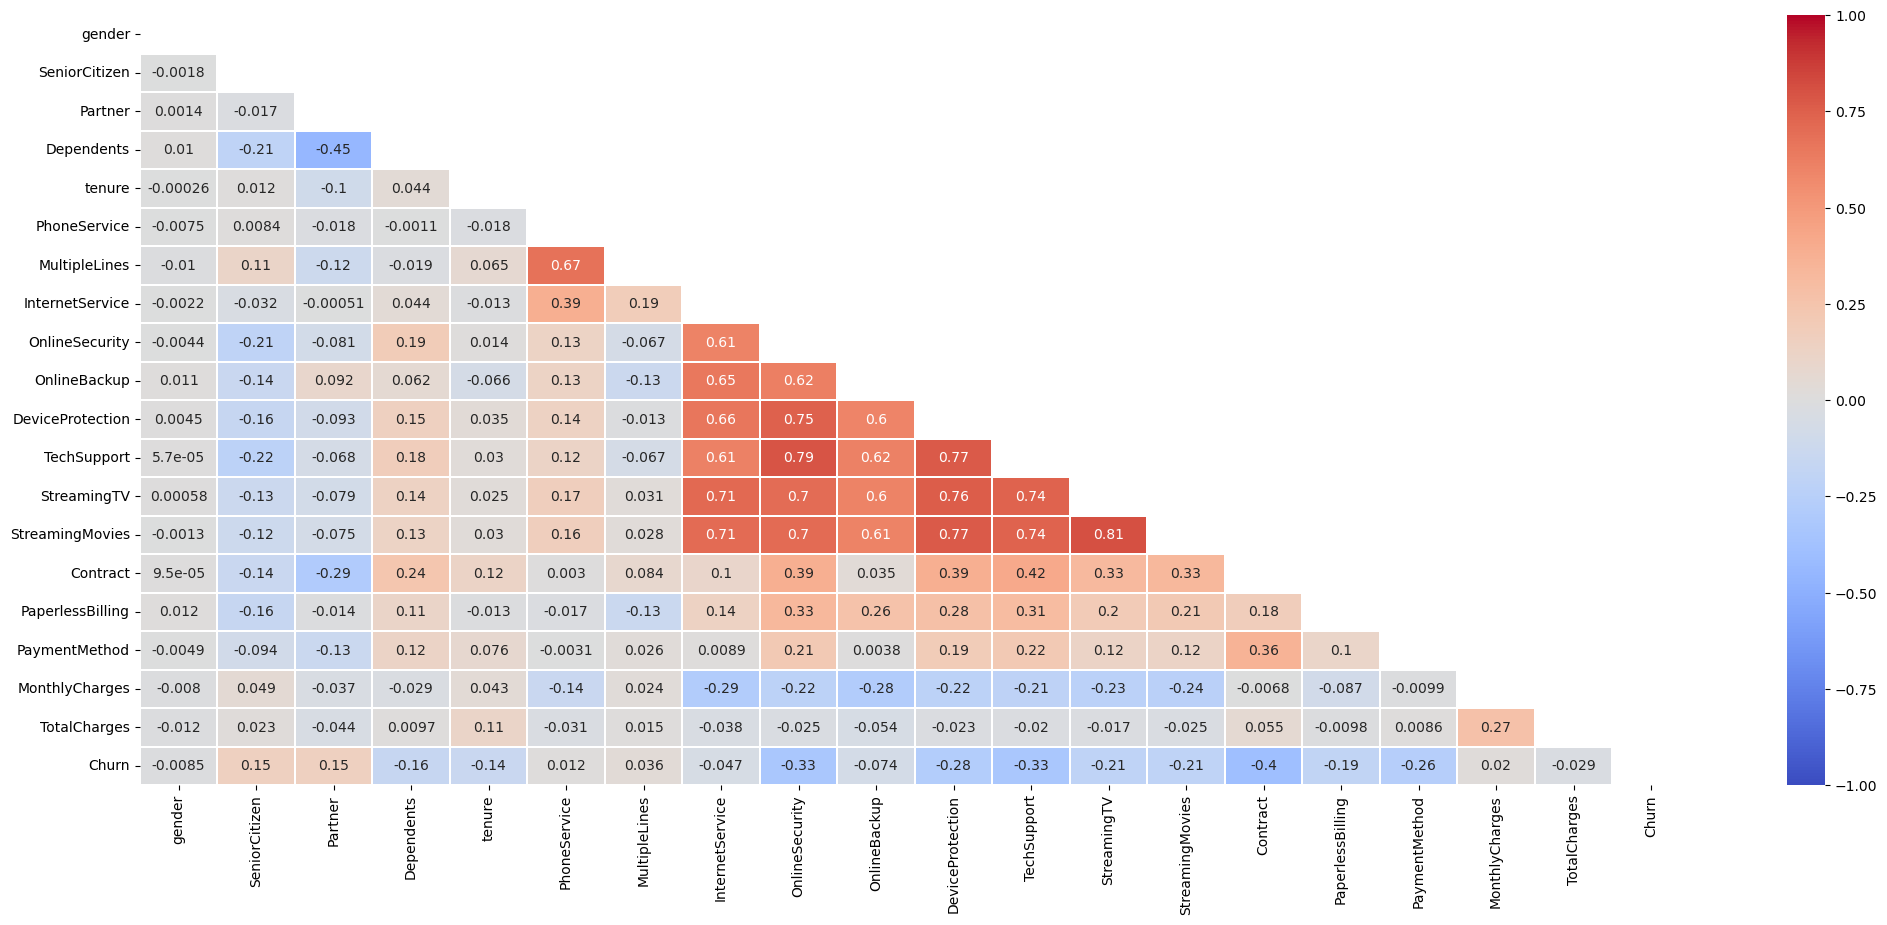

In [120]:
### 4. Find Correlations Between Features
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# 7. Data Processing 

## Convert categorical variables (e.g., ‘Yes/No’) into numerical

In [189]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [191]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [193]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [199]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


## Target & Split the data 

In [207]:
# Split variables indépendantes (X) et cible (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 8. Machine Learning Model Evaluations and Predictions

## Modèle de Régression Logistique (Baseline Model)

In [227]:
# Créer et entraîner le modèle de régression logistique
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [247]:
# Prédictions
y_pred_logreg = logreg_model.predict(X_test)

# Évaluation du modèle
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print("Score de la Logistic Regression :")
print(f"Logistic Regression - Accuracy: {accuracy_logreg}")
print(f"Logistic Regression - Precision: {precision_logreg}")
print(f"Logistic Regression - Recall: {recall_logreg}")
print(f"Logistic Regression - F1 Score: {f1_logreg}")
print(f"Logistic Regression - AUC-ROC: {roc_auc_logreg}")

Score de la Logistic Regression :
Logistic Regression - Accuracy: 0.7860696517412935
Logistic Regression - Precision: 0.622895622895623
Logistic Regression - Recall: 0.4946524064171123
Logistic Regression - F1 Score: 0.5514157973174366
Logistic Regression - AUC-ROC: 0.8307354623623628


## Modèle de Random Forest

In [223]:
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner le modèle de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [250]:
# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print("Score de RandomForestClassifier :")
print(f"Random Forest - Accuracy: {accuracy_rf}")
print(f"Random Forest - Precision: {precision_rf}")
print(f"Random Forest - Recall: {recall_rf}")
print(f"Random Forest - F1 Score: {f1_rf}")
print(f"Random Forest - AUC-ROC: {roc_auc_rf}")

Score de RandomForestClassifier :
Random Forest - Accuracy: 0.7882018479033405
Random Forest - Precision: 0.6347517730496454
Random Forest - Recall: 0.4786096256684492
Random Forest - F1 Score: 0.5457317073170732
Random Forest - AUC-ROC: 0.8117600467979147


## Modèle XGBoost

In [236]:
import xgboost as xgb

# Créer et entraîner le modèle XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [252]:
# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation du modèle
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print("Score de XGBoost :")
print(f"XGBoost - Accuracy: {accuracy_xgb}")
print(f"XGBoost - Precision: {precision_xgb}")
print(f"XGBoost - Recall: {recall_xgb}")
print(f"XGBoost - F1 Score: {f1_xgb}")
print(f"XGBoost - AUC-ROC: {roc_auc_xgb}")

Score de XGBoost :
XGBoost - Accuracy: 0.7775408670931059
XGBoost - Precision: 0.5950155763239875
XGBoost - Recall: 0.5106951871657754
XGBoost - F1 Score: 0.5496402877697841
XGBoost - AUC-ROC: 0.8071656718658597


In [243]:
### Sauvegarde des modèles 
import joblib

# Sauvegarder le modèle de régression logistique
joblib.dump(logreg_model, 'logreg_model.pkl')

# Sauvegarder le modèle de Random Forest
joblib.dump(rf_model, 'rf_model.pkl')

# Sauvegarder le modèle XGBoost
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

Pour notre web app on choisira le modèle de régression logistique en raison de sa meilleure AUC-ROC (83.07%) et de son meilleur compromis entre précision et rappel (F1 Score de 55.14%), offrant ainsi des performances solides pour prédire le churn.

## Modèle avec les var les plus influentes pour alléger notre web app : 

In [275]:
# Split variables indépendantes (X) et cible (y)
X = df[["gender", "SeniorCitizen", "tenure", "PaymentMethod", "Contract", "MonthlyCharges", "TotalCharges"]]
y = df['Churn']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
# Créer et entraîner le modèle de régression logistique
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [279]:
# Prédictions
y_pred_logreg2 = logreg_model.predict(X_test)

# Évaluation du modèle
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
#roc_auc_logreg = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print("Score de la Logistic Regression :")
print(f"Logistic Regression - Accuracy: {accuracy_logreg}")
print(f"Logistic Regression - Precision: {precision_logreg}")
print(f"Logistic Regression - Recall: {recall_logreg}")
print(f"Logistic Regression - F1 Score: {f1_logreg}")
#print(f"Logistic Regression - AUC-ROC: {roc_auc_logreg}")

Score du modèle de régression logistique :
Accuracy: 0.7860696517412935
Precision: 0.622895622895623
Recall: 0.4946524064171123
F1 Score: 0.5514157973174366
AUC-ROC: 0.8163220669769271


In [282]:
# Sauvegarder le modèle de régression logistique
joblib.dump(logreg_model, 'logreg_model3.pkl')

['logreg_model2.pkl']